In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("50_Startups.csv")

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset=pd.get_dummies(dataset, drop_first=True)

In [5]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [6]:
dataset=dataset.astype(int)

In [7]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349,136897,471784,192261,0,1
1,162597,151377,443898,191792,0,0
2,153441,101145,407934,191050,1,0
3,144372,118671,383199,182901,0,1
4,142107,91391,366168,166187,1,0


In [8]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [9]:
independent = dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida', 'State_New York']]
dependent = dataset[['Profit']]

In [10]:
independent.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349,136897,471784,0,1
1,162597,151377,443898,0,0
2,153441,101145,407934,1,0
3,144372,118671,383199,0,1
4,142107,91391,366168,1,0


In [11]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_train, y_test = train_test_split(independent, dependent, test_size=0.3, random_state=0)

In [12]:
X_Train.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
7,130298,145530,323876,1,0
14,119943,156547,256512,1,0
45,1000,124153,1903,0,1
48,542,51743,0,0,1
29,65605,153032,107138,0,1


In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='friedman_mse',splitter='best',max_features='log2')
regressor = regressor.fit(X_Train,y_train)

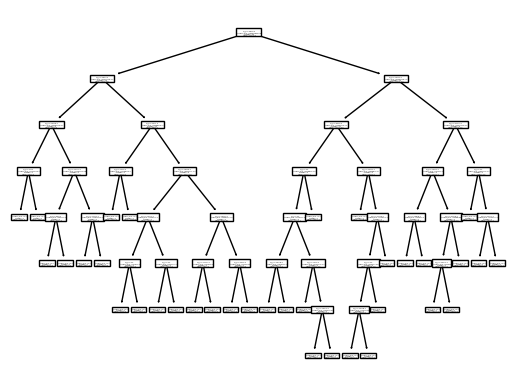

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [15]:
y_pred = regressor.predict(X_Test)

In [16]:
from sklearn.metrics import r2_score

In [17]:
R_Score = r2_score(y_test, y_pred)
print(R_Score)

0.9706654654682786
